# TRABAJO PRÁCTICO EXPERIMENTAL 

---
**PARTE I: IMPORTACIÓN Y EDA**

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Generar datos artificiales para clustering
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

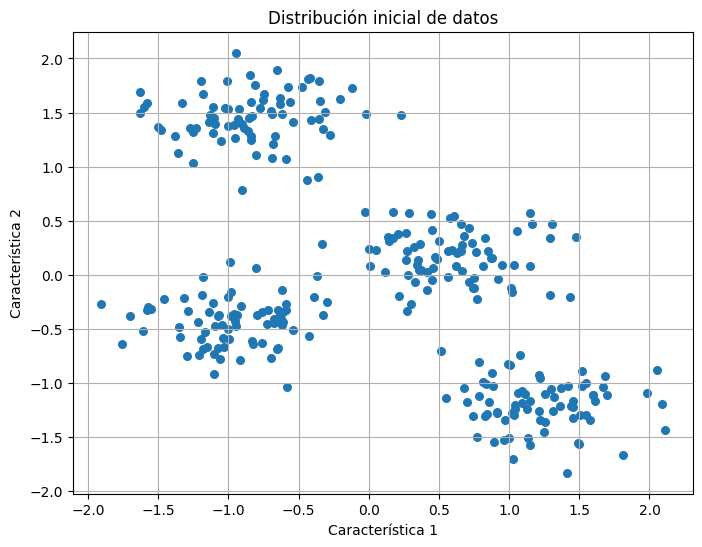

In [3]:
# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Distribución inicial de datos")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()

---
**PARTE II-A: K-MEANS**

---

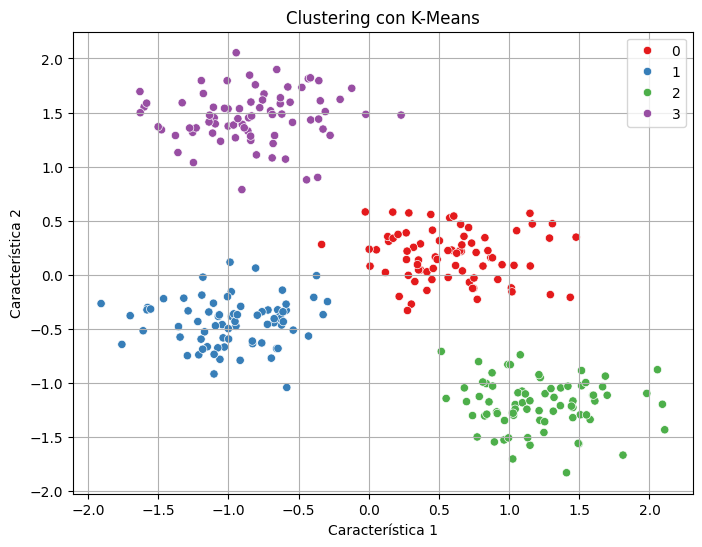

In [ ]:
from sklearn.cluster import KMeans

# Crear modelo KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette='Set1', legend='full')
plt.title("Clustering con K-Means")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()

---
**PARTE II-B: DBSCAN**

---

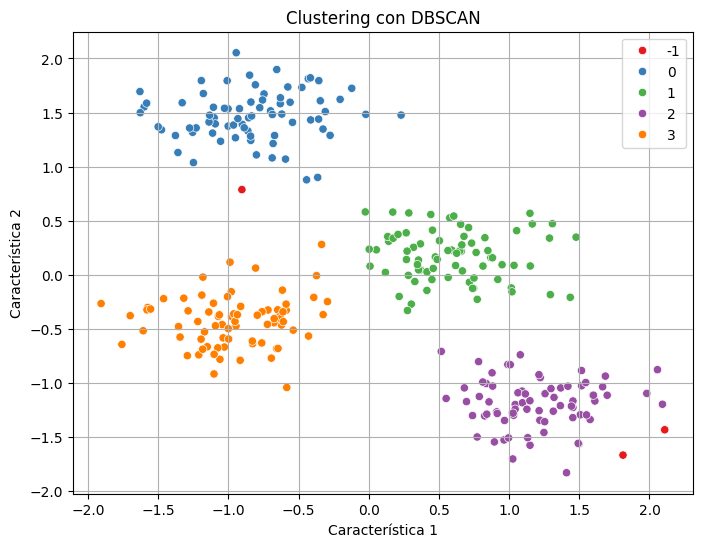

In [14]:
from sklearn.cluster import DBSCAN

# Crear modelo DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=4)
dbscan_labels = dbscan.fit_predict(X)

# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_labels, palette='Set1', legend='full')
plt.title("Clustering con DBSCAN")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.show()

---
**PARTE III: COMPARACIÓN Y CONCLUSIONES**

---

Número de clusters encontrados por K-Means: 4
Número de clusters encontrados por DBSCAN (excluyendo ruido): 4
Número de puntos detectados como ruido por DBSCAN: 3


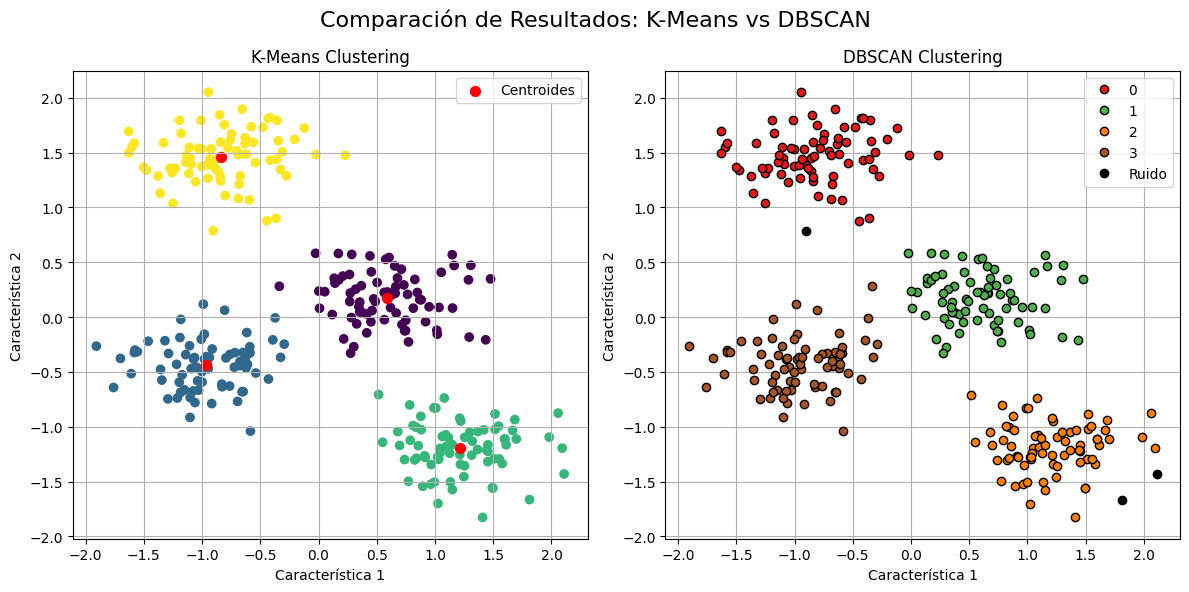

In [16]:

print("Número de clusters encontrados por K-Means:", len(np.unique(kmeans_labels)))
print("Número de clusters encontrados por DBSCAN (excluyendo ruido):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Número de puntos detectados como ruido por DBSCAN:", list(dbscan_labels).count(-1))

# Comparación visual de K-Means y DBSCAN
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# K-Means
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='.', label='Centroides')
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Característica 1")
axes[0].set_ylabel("Característica 2")
axes[0].legend()
axes[0].grid(True)

# DBSCAN
unique_labels = set(dbscan_labels)
colors = [plt.cm.Set1(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, col in zip(unique_labels, colors):
    if label == -1:
        col = [0, 0, 0, 1] 
        label_name = "Ruido"
    else:
        label_name = f"{label}"

    class_member_mask = (dbscan_labels == label)
    axes[1].plot(X[class_member_mask, 0], X[class_member_mask, 1], 'o',
                 markerfacecolor=tuple(col), markeredgecolor='k', markersize=6, label=label_name)

axes[1].set_title("DBSCAN Clustering")
axes[1].set_xlabel("Característica 1")
axes[1].set_ylabel("Característica 2")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Comparación de Resultados: K-Means vs DBSCAN", fontsize=16)
plt.tight_layout()
plt.show()



📌 **1. K-Means:**

* El algoritmo K-Means ha logrado **identificar correctamente los 4 grupos principales** en los datos.
* Asigna **todos los puntos a algún cluster**, incluso aquellos que visualmente podrían considerarse ruido o atípicos.
* Es **sensible a la forma y distribución de los datos**, ya que asume clusters esféricos y de tamaño similar.
* Las posiciones de los **centroides están claramente marcadas** con color rojo, lo cual es útil para interpretaciones basadas en promedios.

📌 **2. DBSCAN:**

* DBSCAN ha clasificado **todos los puntos en un solo cluster (Cluster 0)**, lo que indica que los parámetros (`eps` y `min_samples`) no fueron adecuados para separar los grupos.
* **No detectó múltiples clusters ni ruido**, lo que es atípico para este tipo de datos, confirmando que necesita calibración de hiperparámetros.
* A diferencia de K-Means, DBSCAN **no fuerza a los puntos a un cluster si no cumplen criterios de densidad**, lo cual es útil en presencia de ruido, pero requiere más ajuste.

📌 **3. Comparación general:**

* **K-Means funciona bien** cuando los clusters son bien definidos y similares en tamaño y forma, como en este caso.
* **DBSCAN requiere ajuste** de parámetros para funcionar correctamente. Con valores apropiados de `eps` y `min_samples`, podría identificar los mismos clusters y posiblemente marcar puntos atípicos como ruido.
* **Visualmente**, la segmentación de K-Means es clara y balanceada; DBSCAN en esta ejecución no fue efectivo, lo cual resalta la **importancia de parametrización** adecuada para este tipo de algoritmos basados en densidad.

